In [1]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
sentences = np.load('bert_sentence_embeddings.npy')
labels = np.load('labels.npy')

X_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, shuffle=True)
weights = compute_class_weight(class_weight='balanced',classes=np.array([0,1]), y=y_train)

In [2]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight='balanced')
RF.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

C:\Users\Sergei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


best F1 =  0.4089935760171306
precision =  0.3339160839160839
recall =  0.5276243093922652


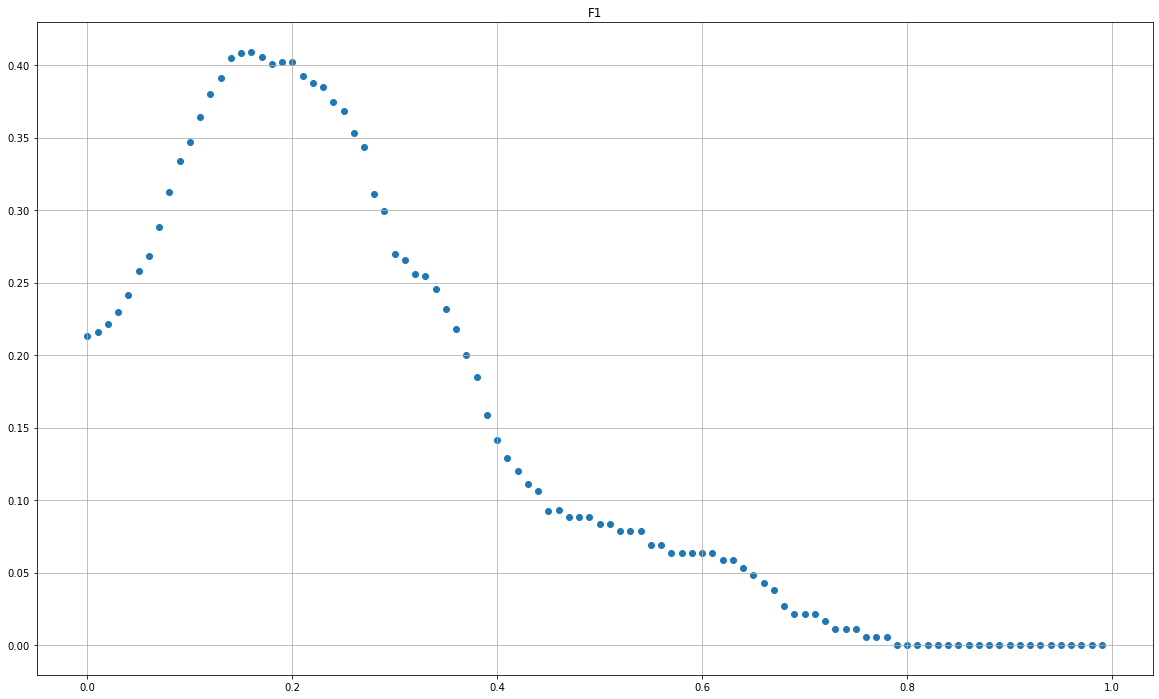

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = RF.predict_proba(x_test)
def preds_with_tr(tr, proba):
    pr = proba[:, 1]
    ans = (pr>tr).astype(int)
    return ans

precisions = []
recalls = []
f1s = []
for t in np.arange(0.,1.,0.01):
    prediction = preds_with_tr(t, proba)
    precisions.append(precision_score(y_test, list(prediction)))
    recalls.append(recall_score(y_test, list(prediction)))
    f1s.append(f1_score(y_test, list(prediction)))
    
print('best F1 = ', max(f1s))
i = np.array(f1s).argmax()
print('precision = ', precisions[i])
print('recall = ', recalls[i])


plt.figure(figsize = (20,12))
plt.grid()
plt.title('F1')
plt.scatter(np.arange(0.,1.,0.01), f1s)
plt.show()

In [4]:
import pickle 

pickle.dump(RF, open("RF.pickle", "wb"))